# Antenna Planning

In [1]:
import os
import pandas as pd

def read_antenna_planning_files(directory):
    """
    读取指定目录中的天线安装规划文件，并规整列名，检查和删除重复行。

    参数:
    directory (str): 包含天线安装规划文件的目录路径。

    返回值:
    pd.DataFrame: 合并后的DataFrame，包含规整后的列名，并删除重复行。
    """
    # 列出目录中的所有文件
    files = os.listdir(directory)

    # 过滤出文件名包含“天线安装规划”关键字的CSV文件
    antenna_files = [file for file in files if '天线安装规划' in file and file.endswith('.csv')]

    # 定义要读取的列
    columns_to_read = ['网元标识', '远端射频单元编号', '本地小区标识1']

    # 初始化一个空的DataFrame列表
    dfs = []

    # 读取每个CSV文件并添加到DataFrame列表中
    for file in antenna_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, encoding='gbk', usecols=columns_to_read)  # 根据需要调整编码格式
        dfs.append(df)

    # 合并所有DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    # 删除重复数据
    combined_df = combined_df.drop_duplicates()

    # 重命名列
    combined_df.columns = ['网元标识', '射频单元编号', '小区本地ID']

    # 检查和删除重复行
    initial_row_count = combined_df.shape[0]
    combined_df = combined_df.drop_duplicates()
    final_row_count = combined_df.shape[0]

    if initial_row_count != final_row_count:
        print(f"Removed {initial_row_count - final_row_count} duplicate rows.")

    return combined_df

# 使用示例
Datadir = r'C:\Users\zhuak\Desktop\Geography\MobileData'
df_AP = read_antenna_planning_files(Datadir)

# 显示前10行数据
print(df_AP.head(10))

       网元标识  射频单元编号  小区本地ID
0   6355826       2       6
4   6355826       3       1
8   6355826       0       4
12  6355826       5       3
16  6355826       1       5
20  6355826       4       2
24  6311444       1       2
28  6311444       0       1
32  6311444       2       3
36  6355609       2       3


# Radio Frequency Planning

In [2]:
import os
import pandas as pd

def read_rf_planning_files(directory):
    """
    读取指定目录中的射频单元规划文件，并规整列名，检查和删除重复行。

    参数:
    directory (str): 包含射频单元规划文件的目录路径。

    返回值:
    pd.DataFrame: 合并后的DataFrame，包含规整后的列名，并删除重复行。
    """
    # 列出目录中的所有文件
    files = os.listdir(directory)

    # 过滤出文件名包含“射频单元规划”关键字的CSV文件
    rf_files = [file for file in files if '射频单元规划' in file and file.endswith('.csv')]

    # 定义要读取的列
    columns_to_read = ['网元标识', '射频单元编号', '射频单元RRU安装经度', '射频单元RRU安装纬度']

    # 初始化一个空的DataFrame列表
    dfs = []

    # 读取每个CSV文件并添加到DataFrame列表中
    for file in rf_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, encoding='gbk', usecols=columns_to_read)  # 根据需要调整编码格式
        dfs.append(df)

    # 合并所有DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    # 删除重复数据
    combined_df = combined_df.drop_duplicates()

    # 重命名列
    combined_df.columns = ['网元标识', '射频单元编号', 'Longitude', 'Latitude']

    # 检查和删除重复行
    initial_row_count = combined_df.shape[0]
    combined_df = combined_df.drop_duplicates()
    final_row_count = combined_df.shape[0]

    if initial_row_count != final_row_count:
        print(f"Removed {initial_row_count - final_row_count} duplicate rows.")

    return combined_df

# 使用示例
Datadir = r'C:\Users\zhuak\Desktop\Geography\MobileData'
df_RF = read_rf_planning_files(Datadir)

# 显示前10行数据
print(df_RF.head(10))

      网元标识  射频单元编号   Longitude   Latitude
0  6355826       1  113.905539  29.490531
1  6355826       0  113.905539  29.490531
2  6355826       3  113.963381  29.488554
3  6355826       2  113.905539  29.490531
4  6355826       5  113.963381  29.488554
5  6355826       4  113.963381  29.488554
6  6311444       2  113.632164  29.716301
7  6311444       1  113.632164  29.716301
8  6311444       0  113.632164  29.716301
9  6313258       0  114.361931  29.782520


# Cell parameters

In [3]:
import os
import pandas as pd

def read_cell_planning_files(directory):
    """
    读取指定目录中的小区规划文件，并规整列名，检查和删除重复行。

    参数:
    directory (str): 包含小区规划文件的目录路径。

    返回值:
    pd.DataFrame: 合并后的DataFrame，包含规整后的列名，并删除重复行。
    """
    # 列出目录中的所有文件
    files = os.listdir(directory)

    # 过滤出文件名包含“NR小区”关键字的CSV文件
    cell_files = [file for file in files if 'NR小区' in file and file.endswith('.csv')]

    # 定义要读取的列
    columns_to_read = ['网元标识', '小区本地ID', '小区友好名']

    # 初始化一个空的DataFrame列表
    dfs = []

    # 读取每个CSV文件并添加到DataFrame列表中
    for file in cell_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, encoding='gbk', usecols=columns_to_read)  # 根据需要调整编码格式
        dfs.append(df)

    # 合并所有DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    # 删除重复数据
    combined_df = combined_df.drop_duplicates()

    # 重命名列
    combined_df.columns = ['网元标识', '小区本地ID', '小区友好名']

    # 检查和删除重复行
    initial_row_count = combined_df.shape[0]
    combined_df = combined_df.drop_duplicates()
    final_row_count = combined_df.shape[0]

    if initial_row_count != final_row_count:
        print(f"Removed {initial_row_count - final_row_count} duplicate rows.")

    return combined_df

# 使用示例
Datadir = r'C:\Users\zhuak\Desktop\Geography\MobileData'
df_CP = read_cell_planning_files(Datadir)

# 显示前10行数据
print(df_CP.head(10))

      网元标识  小区本地ID              小区友好名
0  6311444       2  赤壁鞍嘴700M-D5H-0712
1  6311444       3  赤壁鞍嘴700M-D5H-0713
2  6311444       1  赤壁鞍嘴700M-D5H-0711
3  6355826       1  崇阳荻洲700M-D5H-0711
4  6355826       5  崇阳叶门700M-D5H-0712
5  6355826       4  崇阳叶门700M-D5H-0711
6  6355826       3  崇阳荻洲700M-D5H-0713
7  6355826       2  崇阳荻洲700M-D5H-0712
8  6355826       6  崇阳叶门700M-D5H-0713
9  6355609       1  咸安双塘700M-D5H-0711


# Read HuBei MAP

In [4]:
import os
import pandas as pd
import geopandas as gpd

def read_hubei_map_files(directory, filename):
    """
    读取指定目录中的湖北Map文件。

    参数:
    directory (str): 包含湖北Map文件的目录路径。
    filename (str): 湖北Map文件的文件名。

    返回值:
    gpd.GeoDataFrame: 读取的GeoDataFrame。
    """
    # 构建文件路径
    file_path = os.path.join(directory, filename)

    # 读取GeoJSON文件
    gdf = gpd.read_file(file_path)

    return gdf

# 使用示例
GosDir = r'C:\Users\zhuak\Desktop\Geography'
gdffile = '湖北省村级边界.geojson'
gdf = read_hubei_map_files(GosDir, gdffile)

# 显示前10行数据
print(gdf.head(10))

   OBJECTID SJGZQYMC DSJGZQYMC QXJGZQYMC XZJGZQYMC CJGZQYMC  SHAPE_AREA  \
0     576.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     杨柘坪村    0.001183   
1     577.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     龙潭坪村    0.001642   
2     578.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     立志坪村    0.002743   
3     579.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     雪山河村    0.003297   
4     580.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     杜家冲村    0.001725   
5     581.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     五尖山村    0.001821   
6     582.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇      麻池村    0.002221   
7     583.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇      西湾村    0.000692   
8     584.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇      重溪村    0.001702   
9     585.0      湖北省       宜昌市  长阳土家族自治县      都镇湾镇     朱栗山村    0.001061   

   SHAPE_LEN                                           geometry  
0   0.240019  MULTIPOLYGON (((110.99976 30.33573, 110.99901 ...  
1   0.260185  MULTIPOLYGON (((110.9299 30.

# File Integration

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

def process_rf_ap_cp(df_ap, df_rf, df_cp, gdf):
    """
    合并天线规划数据、射频单元规划数据和小区规划数据，并与地理数据进行空间连接。

    参数:
    df_ap (pd.DataFrame): 天线规划数据。
    df_rf (pd.DataFrame): 射频单元规划数据。
    df_cp (pd.DataFrame): 小区规划数据。
    gdf (gpd.GeoDataFrame): 地理数据。

    返回值:
    gpd.GeoDataFrame: 合并后的GeoDataFrame，包含规整后的列名。
    """
    # 合并天线规划数据和射频单元规划数据
    df_rfap = pd.merge(df_ap, df_rf, how='inner', 
                       left_on=['网元标识', '射频单元编号'],
                       right_on=['网元标识', '射频单元编号'],
                       suffixes=('_df_AP', '_df_RF'))

    # 选择并重命名列
    df_rfap = df_rfap[['网元标识', '小区本地ID', '射频单元编号', 'Longitude', 'Latitude']]

    # 合并射频单元规划数据和小区规划数据
    df_rac = pd.merge(df_rfap, df_cp, how='inner', 
                      left_on=['网元标识', '小区本地ID'],
                      right_on=['网元标识', '小区本地ID'],
                      suffixes=('_df_RFAP', '_df_CP'))

    # 选择并重命名列
    df_rac = df_rac[['网元标识', '小区本地ID', '小区友好名', 'Longitude', 'Latitude']]

    # 创建几何图形列表（点）
    geometry = [Point(xy) for xy in zip(df_rac['Longitude'], df_rac['Latitude'])]

    # 将 pandas DataFrame 转换为 GeoDataFrame
    df_rac = gpd.GeoDataFrame(df_rac, geometry=geometry)

    # 设置 CRS
    if df_rac.crs is None:
        df_rac = df_rac.set_crs(gdf.crs)

    # 空间连接
    gdf_rac = gpd.sjoin(df_rac, gdf, how='inner', predicate='within')

    # 确保 '网元标识' 和 '小区本地ID' 列都是字符串类型
    gdf_rac['网元标识'] = gdf_rac['网元标识'].astype(str)
    gdf_rac['小区本地ID'] = gdf_rac['小区本地ID'].astype(str)

    # 增加列ID
    gdf_rac['ID'] = gdf_rac['网元标识'] + '_' + gdf_rac['小区本地ID']

    # 选择并重命名列
    gdf_rac = gdf_rac[['ID','网元标识', '小区本地ID', '小区友好名', 'Longitude', 'Latitude', 'SJGZQYMC', 'DSJGZQYMC', 'QXJGZQYMC', 'XZJGZQYMC', 'CJGZQYMC']].rename(
        columns={'SJGZQYMC': '省份', 'DSJGZQYMC': '地市', 'QXJGZQYMC': '县区', 'XZJGZQYMC': '镇区', 'CJGZQYMC': '村区'}
    )

    return gdf_rac

# 使用示例

gdf_RAC = process_rf_ap_cp(df_AP, df_RF, df_CP, gdf)

# 显示结果
print(gdf_RAC.head(10))

          ID     网元标识 小区本地ID              小区友好名   Longitude   Latitude   省份  \
0  6355826_6  6355826      6  崇阳叶门700M-D5H-0713  113.905539  29.490531  湖北省   
1  6355826_1  6355826      1  崇阳荻洲700M-D5H-0711  113.963381  29.488554  湖北省   
2  6355826_4  6355826      4  崇阳叶门700M-D5H-0711  113.905539  29.490531  湖北省   
3  6355826_3  6355826      3  崇阳荻洲700M-D5H-0713  113.963381  29.488554  湖北省   
4  6355826_5  6355826      5  崇阳叶门700M-D5H-0712  113.905539  29.490531  湖北省   
5  6355826_2  6355826      2  崇阳荻洲700M-D5H-0712  113.963381  29.488554  湖北省   
6  6311444_2  6311444      2  赤壁鞍嘴700M-D5H-0712  113.632164  29.716301  湖北省   
7  6311444_1  6311444      1  赤壁鞍嘴700M-D5H-0711  113.632164  29.716301  湖北省   
8  6311444_3  6311444      3  赤壁鞍嘴700M-D5H-0713  113.632164  29.716301  湖北省   
9  6355609_3  6355609      3  咸安双塘700M-D5H-0713  114.396858  29.941706  湖北省   

    地市   县区    镇区   村区  
0  咸宁市  崇阳县   石城镇  方山村  
1  咸宁市  崇阳县   石城镇  荻洲村  
2  咸宁市  崇阳县   石城镇  方山村  
3  咸宁市  崇阳县   石城镇  荻洲村  
4  咸宁

In [6]:
gdf_RAC.sample(50)

,ID,网元标识,小区本地ID,小区友好名,Longitude,Latitude,省份,地市,县区,镇区,村区
2756,6337805_1,6337805,1,郧西滨河湾700M-D5H-0711,110.423256,32.978924,湖北省,十堰市,郧西县,城关镇,天河坪村
12583,6312522_2,6312522,2,D_崇阳国际商贸城C4C9C12栋-D5S-2662,114.054960,29.549151,湖北省,咸宁市,崇阳县,天城镇,龙背村
1409,6341677_3,6341677,3,竹山竹坪龙凤700M-D5H-0713,109.604803,32.501995,湖北省,十堰市,竹山县,竹坪乡,六合村
7723,6313180_2,6313180,2,通城宝塔700M-D5H-0712,113.797173,29.234522,湖北省,咸宁市,通城县,隽水镇,古龙村
7206,6322737_2,6322737,2,红安太平火镰山700M-D5H-0712,114.636050,30.942590,湖北省,黄冈市,红安县,太平桥镇,火镰山村
1607,6313115_6,6313115,6,赤壁码头电信共享700M-D5H-0713,113.626411,29.884562,湖北省,咸宁市,赤壁市,赤壁镇,东风村
1603,6313115_7,6313115,7,赤壁镇700M-D5H-0711,113.626411,29.884562,湖北省,咸宁市,赤壁市,赤壁镇,东风村
9146,6313152_5,6313152,5,嘉鱼首义学院大门西700M-D5H-0712,113.938957,29.956900,湖北省,咸宁市,嘉鱼县,鱼岳镇,十景铺村
10358,6334879_8,6334879,8,房县农商银行-D5H-2613,110.725420,32.056658,湖北省,十堰市,房县,城关镇,下西关社区
10324,6337222_0,6337222,0,丹江旅游港-D5H-2611,111.488312,32.536808,湖北省,十堰市,丹江口市,三官殿街道,马湾村


# Read KPI file and Regular format

In [7]:
import os
import pandas as pd
import re

def read_and_process_kpi_files(directory, keyword='DT_PowerBI指标通报计数器_', file_extension='.csv'):
    """
    读取指定目录中的KPI文件，合并、处理日期和字符串列、转换特定列的数据类型、提取列名中的代码，并删除重复行和特定列。

    参数:
    directory (str): 包含KPI文件的目录路径。
    keyword (str): 文件名中包含的关键字，默认值为 'DT_PowerBI指标通报计数器_'。
    file_extension (str): 文件扩展名，默认值为 '.csv'。

    返回值:
    pd.DataFrame: 处理后的DataFrame，包含所有读取的KPI数据，并删除了重复行。
    """
    # 列出目录中的所有文件
    files = os.listdir(directory)
    print(f"目录中的所有文件: {files}")  # 调试信息

    # 过滤出包含特定关键字的CSV文件
    kpi_files = [file for file in files if keyword in file and file.lower().endswith(file_extension)]
    print(f"过滤出的文件: {kpi_files}")  # 调试信息

    # 初始化一个空的DataFrame列表
    dfs = []

    # 读取每个CSV文件并添加到DataFrame列表中
    for file in kpi_files:
        file_path = os.path.join(directory, file)
        print(f"正在读取文件: {file_path}")  # 调试信息
        try:
            df = pd.read_csv(file_path, skiprows=2, header=0, encoding='cp936', na_values=["n/a", "na", "-"])
            df.columns = df.columns.str.replace(' ', '')  # 去除列名中的空格
            dfs.append(df)
            print(f"成功读取文件: {file_path}")  # 调试信息
        except UnicodeDecodeError as e:
            print(f"读取文件时发生编码错误：{e}")
        except Exception as e:
            print(f"读取文件时发生其他错误：{e}")

    # 检查是否成功读取了任何文件
    if not dfs:
        print("没有成功读取任何文件，请检查文件路径和过滤条件。")
        return pd.DataFrame()  # 返回空的DataFrame
    else:
        # 合并所有DataFrame
        df_kpi = pd.concat(dfs, ignore_index=True)
        
        # 删除重复行
        df_kpi = df_kpi.drop_duplicates()

        # 处理日期列
        date_columns = ['开始时间', '结束时间']
        for column_date in date_columns:
            df_kpi[column_date] = df_kpi[column_date].astype(str).str.split().str[0]
            df_kpi[column_date] = pd.to_datetime(df_kpi[column_date], errors='coerce')
            df_kpi[column_date] = df_kpi[column_date].dt.strftime('%Y-%m-%d')

        # 拆分字符串列
        df_kpi[["小区名称", "Other"]] = df_kpi["对象"].str.split('\(g', n=1, expand=True)
        df_kpi[["NB", "nrCellCfg"]] = df_kpi["Other"].str.split(',', n=1, expand=True)
        df_kpi["NB"] = df_kpi["NB"].str.lstrip('NB=')
        df_kpi["nrCellCfg"] = df_kpi["nrCellCfg"].str.lstrip('nrCellCfg=').str.rstrip(')')
        df_kpi.drop(columns=["对象", "Other"], inplace=True)

        # 确保 '网元标识' 和 '小区本地ID' 列都是字符串类型
        df_kpi['NB'] = df_kpi['NB'].astype(str)
        df_kpi['nrCellCfg'] = df_kpi['nrCellCfg'].astype(str)

        # 增加列ID
        df_kpi['ID'] = df_kpi['NB'] + '_' + df_kpi['nrCellCfg']

        # 获取列的总数
        num_columns = len(df_kpi.columns)

        # 创建新的列顺序：最后三列 + 所有其他列（除去最后三列）
        new_order = df_kpi.columns[-3:].tolist() + df_kpi.columns[:-3].tolist()

        # 重新索引以更改列顺序
        df_kpi = df_kpi[new_order]

        # 转换特定列的数据类型
        int_columns = df_kpi.loc[:, 'gNB请求释放的5QI为1的Flow数(R2035_003)[个]':'gNBRRC连接建立成功次数-moVideoCall(R1001_019)[次]'].columns
        for col in int_columns:
            df_kpi[col] = pd.to_numeric(df_kpi[col], errors='coerce').fillna(0).astype(float).astype(int)

        float_columns = ['5QI为1的平均Flow数(K1009_001)[个]', '5QI为2的平均Flow数(K1009_002)[个]']
        for col in float_columns:
            df_kpi[col] = pd.to_numeric(df_kpi[col], errors='coerce').fillna(0).round(2)

        # 删除 '小区名称' 列
        df_kpi = df_kpi.drop(columns=['小区名称'])

        
        # 单位从0.01KB改为KB
        df_kpi['小区用户面RLCSDU上行尾包字节数(R1501_005)[0.01KByte]'] = df_kpi['小区用户面RLCSDU上行尾包字节数(R1501_005)[0.01KByte]'] / 100
        df_kpi['小区用户面RLCSDU下行尾包字节数(R1501_006)[0.01KByte]'] = df_kpi['小区用户面RLCSDU下行尾包字节数(R1501_006)[0.01KByte]'] / 100
        

        # 定义函数来提取括号中的内容
        def extract_code(column_name):
            match = re.search(r'\((.*?)\)', column_name)
            if match:
                return match.group(1)
            return column_name

        # 替换 DataFrame 的列名
        df_kpi.columns = df_kpi.columns.to_series().apply(extract_code)

        return df_kpi

# 使用示例
KPIDir = r'C:\Users\zhuak\Desktop\Geography\MobileData'
df_KPI = read_and_process_kpi_files(KPIDir)

# 显示前10行数据
if not df_KPI.empty:
    print(df_KPI.head(10))
else:
    print("没有数据可显示。")

# 使用示例
KPIDir = r'C:\Users\zhuak\Desktop\Geography\MobileData'
df_KPI = read_and_process_kpi_files(KPIDir)

# 显示前10行数据
if not df_KPI.empty:
    print(df_KPI.head(10))
else:
    print("没有数据可显示。")

<>:61: SyntaxWarning: invalid escape sequence '\('
<>:61: SyntaxWarning: invalid escape sequence '\('
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12564\56360348.py:61: SyntaxWarning: invalid escape sequence '\('
  df_kpi[["小区名称", "Other"]] = df_kpi["对象"].str.split('\(g', n=1, expand=True)


目录中的所有文件: ['700MNR小区(3100600).csv', '700M射频单元规划(3000322).csv', 'df_KPI.csv', 'df_KPI_utf8.csv', 'DT_BBU功耗_FDD_20240904000000_20240911000000.CSV', 'DT_BBU功耗_TDD_20240904000000_20240911000000.CSV', 'DT_PowerBI指标通报计数器_FDD_20240904000000_20240911000000.CSV', 'DT_PowerBI指标通报计数器_TDD_20240904000000_20240911000000.CSV', 'DT_RRU功耗_FDD_20240904000000_20240911000000.CSV', 'DT_RRU功耗_TDD_20240904000000_20240911000000.CSV', 'FDD天线安装规划(3000323).csv', 'gdf_RAC.xlsx', 'TDDNR小区(3100600).csv', 'TDD天线安装规划(3000323).csv', 'TDD射频单元规划(3000322).csv', '湖北人口json.rar', '湖北省村级边界.geojson', '第七次人口普查100m分辨率人口栅格数据_China2020_100m.tif']
过滤出的文件: ['DT_PowerBI指标通报计数器_FDD_20240904000000_20240911000000.CSV', 'DT_PowerBI指标通报计数器_TDD_20240904000000_20240911000000.CSV']
正在读取文件: C:\Users\Administrator\Documents\MnewData\DT_PowerBI指标通报计数器_FDD_20240904000000_20240911000000.CSV
成功读取文件: C:\Users\Administrator\Documents\MnewData\DT_PowerBI指标通报计数器_FDD_20240904000000_20240911000000.CSV
正在读取文件: C:\Users\Administrator\Documents\MnewData\D

In [8]:
df_KPI.head(10)

,NB,nrCellCfg,ID,开始时间,结束时间,Nr小区工作频段,MHz,逻辑小区id,R2035_003,R2035_013,...,R1001_001,R1001_004,R1001_007,R1001_008,R1001_012,R1001_015,R1001_018,R1001_019,K1009_001,K1009_002
0,6299318,1,6299318_1,2024-09-04,2024-09-05,band28(758~803MHz)(28),30(5),1.0,1,1,...,9884,2432,98,0,9848,2428,98,0,7.47,0.21
1,6299318,1,6299318_1,2024-09-05,2024-09-06,band28(758~803MHz)(28),30(5),1.0,2,2,...,9702,2508,100,0,9668,2505,100,0,5.65,0.36
2,6299318,1,6299318_1,2024-09-06,2024-09-07,band28(758~803MHz)(28),30(5),1.0,3,3,...,14232,3982,125,0,14185,3978,125,0,8.54,0.32
3,6299318,1,6299318_1,2024-09-07,2024-09-08,band28(758~803MHz)(28),30(5),1.0,5,5,...,17243,4610,137,0,17172,4600,136,0,11.19,0.60
4,6299318,1,6299318_1,2024-09-08,2024-09-09,band28(758~803MHz)(28),30(5),1.0,2,2,...,13964,4258,125,0,13883,4248,124,0,6.63,0.36
5,6299318,1,6299318_1,2024-09-09,2024-09-10,band28(758~803MHz)(28),30(5),1.0,5,4,...,10206,2876,84,0,10166,2867,84,0,3.54,0.20
6,6299318,1,6299318_1,2024-09-10,2024-09-11,band28(758~803MHz)(28),30(5),1.0,3,3,...,13395,3690,102,0,13332,3681,102,0,4.52,0.30
7,6299318,2,6299318_2,2024-09-04,2024-09-05,band28(758~803MHz)(28),30(5),2.0,10,10,...,24187,4855,187,0,24102,4845,186,0,15.42,0.56
8,6299318,2,6299318_2,2024-09-05,2024-09-06,band28(758~803MHz)(28),30(5),2.0,13,13,...,26347,6148,213,0,26267,6141,213,0,14.45,0.69
9,6299318,2,6299318_2,2024-09-06,2024-09-07,band28(758~803MHz)(28),30(5),2.0,7,7,...,28881,6504,229,0,28773,6495,228,0,17.00,0.80


# transport NAS MariaDB

In [10]:
import os
import pandas as pd
import re
from sqlalchemy import create_engine, text, Table, Column, MetaData, String, Integer, Float, Date
from sqlalchemy.exc import SQLAlchemyError
from sqlalchemy.pool import QueuePool
import time

# 数据库连接信息
DB_USER = 'root'
DB_PASSWORD = 'root1234'
DB_HOST = '27.16.178.213'
DB_PORT = 3306
DB_NAME = 'NewDBone'
TABLE_NAME = 'NetworkPerformance'

def create_db_engine(user, password, host, port, db_name=None, charset='utf8mb4'):
    """
    创建数据库引擎
    """
    if db_name:
        connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{db_name}?charset={charset}"
    else:
        connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}?charset={charset}"
    
    return create_engine(connection_string, poolclass=QueuePool, pool_size=5, max_overflow=10, pool_timeout=30, pool_recycle=3600)

def create_database(engine, db_name):
    """
    创建数据库（如果不存在）
    """
    with engine.connect() as connection:
        try:
            connection.execute(text(f"CREATE DATABASE IF NOT EXISTS {db_name} CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci"))
            print(f"Database {db_name} created or already exists.")
        except SQLAlchemyError as e:
            print(f"Error creating database: {e}")
            exit(1)

def generate_table_columns(df):
    """
    根据DataFrame生成数据表的列定义
    """
    columns = []
    for column_name, dtype in df.dtypes.items():
        if pd.api.types.is_integer_dtype(dtype):
            columns.append(Column(column_name, Integer))
        elif pd.api.types.is_float_dtype(dtype):
            columns.append(Column(column_name, Float))
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            columns.append(Column(column_name, Date))
        else:
            columns.append(Column(column_name, String(255)))
    return columns

def create_table(engine, table_name, columns):
    """
    创建数据表（如果不存在）
    """
    metadata = MetaData()
    table = Table(table_name, metadata, *columns, mysql_charset='utf8mb4')
    with engine.connect() as connection:
        try:
            table.create(connection, checkfirst=True)
            print(f"Table {table_name} created or already exists.")
        except SQLAlchemyError as e:
            print(f"Error creating table: {e}")
            exit(1)
    return table

def upload_data_to_table(df, table_name, engine, columns):
    """
    上传数据到数据表
    """
    try:
        df.to_sql(table_name, con=engine, if_exists='append', index=False, dtype={col.name: col.type for col in columns})
        print(f"Data uploaded successfully to table {table_name} in database {DB_NAME}.")
    except SQLAlchemyError as e:
        print(f"Error uploading data: {e}")
        exit(1)

# 创建数据库引擎（不指定数据库）
engine = create_db_engine(DB_USER, DB_PASSWORD, DB_HOST, DB_PORT)

# 创建数据库（如果不存在）
create_database(engine, DB_NAME)

# 使用新创建的数据库
engine = create_db_engine(DB_USER, DB_PASSWORD, DB_HOST, DB_PORT, DB_NAME)

# 自动生成数据表的列定义
columns = generate_table_columns(df_KPI)

# 创建数据表（如果不存在）
table = create_table(engine, TABLE_NAME, columns)

# 上传数据到数据表
upload_data_to_table(df_KPI, TABLE_NAME, engine, columns)

Database NewDBone created or already exists.
Table NetworkPerformance created or already exists.
Data uploaded successfully to table NetworkPerformance in database NewDBone.


In [37]:
import pandas as pd
# 定义保存路径和文件名
GosDir = r'C:\Users\Administrator\Documents\MnewData'
file_name = 'gdf_RAC.xlsx'
file_path = os.path.join(GosDir, file_name)

# 保存为 Excel 文件
gdf_RAC.to_excel(file_path, index=False)
gdf_RAC.sample(50)

,ID,网元标识,小区本地ID,小区友好名,Longitude,Latitude,省份,地市,县区,镇区,村区
7985,6355685_2,6355685,2,通山西坑口700M-D5H-0712,114.803436,29.466217,湖北省,咸宁市,通山县,洪港镇,杨林村
12130,6337537_2,6337537,2,郧西法院-D5H-2613,110.422462,32.984566,湖北省,十堰市,郧西县,城关镇,天河坪村
3566,6299383_5,6299383,5,房县谢湾四组700M-D5H-0712,110.712014,32.115577,湖北省,十堰市,房县,红塔镇,谢湾村
4135,6337810_5,6337810,5,武当山均县中学700M-D5H-0712,111.065674,32.661713,湖北省,十堰市,丹江口市,均县镇,核桃园村
13350,6337112_1,6337112,1,丹江盐池河-D5H-2612,111.051651,32.329353,湖北省,十堰市,丹江口市,盐池河镇,盐池湾村
1973,6338360_1,6338360,1,竹山全胜700M-D5H-0711,109.775139,32.518650,湖北省,十堰市,竹山县,大庙乡,黄兴村
4390,6337944_2,6337944,2,林区长岩屋1#700M-D5H-0712,110.283730,31.457306,湖北省,直辖县级行政区,神农架林区,红坪镇,温水村
1658,6338363_2,6338363,2,竹山西岭700M-D5H-0712,109.803108,32.429695,湖北省,十堰市,竹山县,秦古镇,西岭村
2582,6334742_1,6334742,1,郧西小坪沟700M-D5H-0711,110.311510,33.031080,湖北省,十堰市,郧西县,土门镇,龙潭村
11019,6338039_0,6338039,0,丹江林杰锻造-D5H-2611,111.483742,32.534367,湖北省,十堰市,丹江口市,三官殿街道,马湾村


In [26]:
import pandas as pd


# 确保列名和数据内容使用一致的编码格式
df_KPI.columns = df_KPI.columns.str.encode('utf-8').str.decode('utf-8')

GosDir = r'C:\Users\Administrator\Documents\MnewData'
file_name = 'df_KPI.csv'
file_path = os.path.join(GosDir, file_name)

# 导出为 CSV 文件

df_KPI.to_csv(file_path, index=False, encoding='utf-8')
print(f"DataFrame exported to {file_path}")

DataFrame exported to C:\Users\Administrator\Documents\MnewData\df_KPI.csv


# 合并数据

In [9]:
# 确保列名和数据内容使用一致的编码格式
df_KPI.columns = df_KPI.columns.str.encode('utf-8').str.decode('utf-8')
gdf_RAC.columns = gdf_RAC.columns.str.encode('utf-8').str.decode('utf-8')

# 合并数据框
merged_df = pd.merge(df_KPI, gdf_RAC, on='ID', how='left')

print(merged_df)

             NB nrCellCfg         ID        开始时间        结束时间  \
0       6299318         1  6299318_1  2024-09-04  2024-09-05   
1       6299318         1  6299318_1  2024-09-05  2024-09-06   
2       6299318         1  6299318_1  2024-09-06  2024-09-07   
3       6299318         1  6299318_1  2024-09-07  2024-09-08   
4       6299318         1  6299318_1  2024-09-08  2024-09-09   
...         ...       ...        ...         ...         ...   
100578  6355941         2  6355941_2  2024-09-10  2024-09-11   
100579  6355941         2  6355941_2  2024-09-10  2024-09-11   
100580  6355941         2  6355941_2  2024-09-10  2024-09-11   
100581  6355941         2  6355941_2  2024-09-10  2024-09-11   
100582  6355941         2  6355941_2  2024-09-10  2024-09-11   

                        Nr小区工作频段      MHz  逻辑小区id  R2035_003  R2035_013  ...  \
0         band28(758~803MHz)(28)    30(5)     1.0          1          1  ...   
1         band28(758~803MHz)(28)    30(5)     1.0          2          2

In [10]:
merged_df.sample()

,NB,nrCellCfg,ID,开始时间,结束时间,Nr小区工作频段,MHz,逻辑小区id,R2035_003,R2035_013,...,网元标识,小区本地ID,小区友好名,Longitude,Latitude,省份,地市,县区,镇区,村区
1258,6299376,3,6299376_3,2024-09-09,2024-09-10,band28(758~803MHz)(28),30(5),3.0,1,1,...,6299376,3,房县巨峪700M-D5H-0713,110.341412,32.02078,湖北省,十堰市,房县,门古寺镇,巨峪村


# 定义指标

In [15]:
import pandas as pd

def calculate_all_metrics(df):
    df["最大RRC连接用户数"] = df["R1504_002"]
    df["平均RRC连接用户数"] = df["R1504_001"] / df["R1504_029"]
    df["下行PDCP层业务流量"] = df["R2032_012"] / 1000 / 1000
    df["上行PDCP层业务流量"] = df["R2032_001"] / 1000 / 1000
    df["总流量"] = (df["R1012_001"] + df["R1012_002"]) / 1000000
    df["上行用户平均速率"] = (df["R1501_001"] - df["R1501_005"] / 100) * 8 / df["R1501_003"]
    df["下行用户平均速率"] = (df["R1501_002"] - df["R1501_006"] / 100) * 8 / df["R1501_004"]
    df["VoNR语音话务量"] = df["K1009_001"] / 4
    df["ViNR视频话务量"] = df["K1009_002"] / 4
    df["RRC连接建立成功率"] = df["R1001_012"] / df["R1001_001"] * 100
    df["初始QosFlow建立成功率"] = 100 * df["R2034_054"] / df["R2034_043"]
    df["NG信令连接建立成功率"] = (df["R2039_002"] / df["R2039_001"]) * 100
    df["无线接通率"] = (df["R1001_012"] / df["R1001_001"]) * (df["R1034_012"] / df["R1034_001"]) * (df["R1039_002"] / df["R1039_001"]) * 100
    df["无线掉线率"] = 100 * (df["R1004_003"] - df["R1004_004"]) / (df["R1004_002"] + df["R1004_007"] + df["R1005_012"] + df["R1006_012"] )
    df["UE上下文异常掉线率"] = 100 * (df["R2004_003"] - df["R2004_004"]) / (df["R2004_003"] + df["R2004_006"])
    df["RRC连接重建比例"] = 100 * df["R1053_001"] / (df["R1053_001"] + df["R1001_001"])
    df["系统内切换成功率"] = 100 * ((df["R2007_002"] + df["R2007_004"] + df["R2006_004"] + df["R2006_008"] + df["R2005_004"] + df["R2005_008"]) / (df["R2007_001"] + df["R2007_003"] + df["R2006_001"] + df["R2006_005"] + df["R2005_001"] + df["R2005_005"]))
    df["5GCQI优良率"] = 100 * (df["R1048_043"] + df["R1048_044"] + df["R1048_045"] + df["R1048_046"] + df["R1048_047"] + df["R1048_048"] + df["R1048_059"] + df["R1048_060"] + df["R1048_061"] + df["R1048_062"] + df["R1048_063"] + df["R1048_064"] + df["R1048_075"] + df["R1048_076"] + df["R1048_077"] + df["R1048_078"] + df["R1048_079"] + df["R1048_080"] + df["R1048_091"] + df["R1048_092"] + df["R1048_093"] + df["R1048_094"] + df["R1048_095"] + df["R1048_096"] + df["R1048_104"] + df["R1048_105"] + df["R1048_106"] + df["R1048_107"] + df["R1048_108"] + df["R1048_109"] + df["R1048_110"] + df["R1048_111"] + df["R1048_112"] + df["R1048_120"] + df["R1048_121"] + df["R1048_122"] + df["R1048_123"] + df["R1048_124"] + df["R1048_125"] + df["R1048_126"] + df["R1048_127"] + df["R1048_128"] + df["R1048_136"] + df["R1048_137"] + df["R1048_138"] + df["R1048_139"] + df["R1048_140"] + df["R1048_141"] + df["R1048_142"] + df["R1048_143"] + df["R1048_144"] + df["R1048_152"] + df["R1048_153"] + df["R1048_154"] + df["R1048_155"] + df["R1048_156"] + df["R1048_157"] + df["R1048_158"] + df["R1048_159"] + df["R1048_160"]) / (df["R1048_033"] + df["R1048_034"] + df["R1048_035"] + df["R1048_036"] + df["R1048_037"] + df["R1048_038"] + df["R1048_039"] + df["R1048_040"] + df["R1048_041"] + df["R1048_042"] + df["R1048_043"] + df["R1048_044"] + df["R1048_045"] + df["R1048_046"] + df["R1048_047"] + df["R1048_048"] + df["R1048_049"] + df["R1048_050"] + df["R1048_051"] + df["R1048_052"] + df["R1048_053"] + df["R1048_054"] + df["R1048_055"] + df["R1048_056"] + df["R1048_057"] + df["R1048_058"] + df["R1048_059"] + df["R1048_060"] + df["R1048_061"] + df["R1048_062"] + df["R1048_063"] + df["R1048_064"] + df["R1048_065"] + df["R1048_066"] + df["R1048_067"] + df["R1048_068"] + df["R1048_069"] + df["R1048_070"] + df["R1048_071"] + df["R1048_072"] + df["R1048_073"] + df["R1048_074"] + df["R1048_075"] + df["R1048_076"] + df["R1048_077"] + df["R1048_078"] + df["R1048_079"] + df["R1048_080"] + df["R1048_081"] + df["R1048_082"] + df["R1048_083"] + df["R1048_084"] + df["R1048_085"] + df["R1048_086"] + df["R1048_087"] + df["R1048_088"] + df["R1048_089"] + df["R1048_090"] + df["R1048_091"] + df["R1048_092"] + df["R1048_093"] + df["R1048_094"] + df["R1048_095"] + df["R1048_096"] + df["R1048_097"] + df["R1048_098"] + df["R1048_099"] + df["R1048_100"] + df["R1048_101"] + df["R1048_102"] + df["R1048_103"] + df["R1048_104"] + df["R1048_105"] + df["R1048_106"] + df["R1048_107"] + df["R1048_108"] + df["R1048_109"] + df["R1048_110"] + df["R1048_111"] + df["R1048_112"] + df["R1048_113"] + df["R1048_114"] + df["R1048_115"] + df["R1048_116"] + df["R1048_117"] + df["R1048_118"] + df["R1048_119"] + df["R1048_120"] + df["R1048_121"] + df["R1048_122"] + df["R1048_123"] + df["R1048_124"] + df["R1048_125"] + df["R1048_126"] + df["R1048_127"] + df["R1048_128"] + df["R1048_129"] + df["R1048_130"] + df["R1048_131"] + df["R1048_132"] + df["R1048_133"] + df["R1048_134"] + df["R1048_135"] + df["R1048_136"] + df["R1048_137"] + df["R1048_138"] + df["R1048_139"] + df["R1048_140"] + df["R1048_141"] + df["R1048_142"] + df["R1048_143"] + df["R1048_144"] + df["R1048_145"] + df["R1048_146"] + df["R1048_147"] + df["R1048_148"] + df["R1048_149"] + df["R1048_150"] + df["R1048_151"] + df["R1048_152"] + df["R1048_153"] + df["R1048_154"] + df["R1048_155"] + df["R1048_156"] + df["R1048_157"] + df["R1048_158"] + df["R1048_159"] + df["R1048_160"])
    df["小区上行平均干扰电平"] = df["R1022_001"]
    df["VONR语音峰值用户数"] = df["R1009_013"]
    df["VoNR无线接通率(5QI1)"] = 100 * (df["R1034_013"] / df["R1034_002"]) * (df["R1001_018"] + df["R1001_015"]) / (df["R1001_007"] + df["R1001_004"])
    df["VoNR无线接通率(5QI2)"] = 100 * (df["R1034_014"] / df["R1034_003"]) * (df["R1001_019"] + df["R1001_015"]) / (df["R1001_008"] + df["R1001_004"])
    df["VoNR语音掉线率"] = 100 * ((df["R2035_003"] - df["R2035_013"]) / (df["R2035_003"] + df["R2035_026"]))
    df["掉线率(5QI2)(小区级)"] = 100 * (df["R1035_004"] - df["R1035_014"] + df["R1037_014"]) / (df["R1009_036"] + df["R1034_014"] + df["R1037_003"])
    df["上行PDCPSDU平均丢包率(5QI1)"] = 100 * df["R1033_015"] / df["R1033_005"]
    df["上行PDCPSDU平均丢包率(5QI2)"] = 100 * df["R1033_016"] / df["R1033_006"]
    df["下行RLCSDU平均丢包率(5QI1)"] = 100 * df["R1012_020"] / df["R1012_010"]
    df["下行RLCSDU平均丢包率(5QI2)"] = 100 * df["R1012_021"] / df["R1012_011"]
    df["VoNR系统内切换成功率"] = 100 * (df["R2005_063"] + df["R2005_067"] + df["R2006_071"] + df["R2006_075"] + df["R2007_036"] + df["R2007_040"]) / (df["R2005_060"] + df["R2005_064"] + df["R2006_068"] + df["R2006_072"] + df["R2007_033"] + df["R2007_037"])
    df["系统内VoNR用户切换成功率_5QI1"] = 100 * (df["R2005_027"] + df["R2005_031"] + df["R2005_039"] + df["R2006_025"] + df["R2006_029"] + df["R2006_037"] + df["R2007_008"] + df["R2007_010"] + df["R2007_014"]) / (df["R2005_024"] + df["R2005_028"] + df["R2005_036"] + df["R2006_022"] + df["R2006_026"] + df["R2006_034"] + df["R2007_007"] + df["R2007_009"] + df["R2007_013"])
    df["EPSFallbackVoLTE回落成功率"] = 100 * (df["R2075_001"] + df["R2040_014"]) / df["R2034_033"]
    return df

# 示例调用

# result_df = calculate_all_metrics(df)
# print(result_df)

# 自定义分组函数

In [16]:
def custom_grouping(df, group_by_columns):
    """
    自定义分组函数

    :param df: 输入的 DataFrame
    :param group_by_columns: 用于分组的列名列表
    :return: 计算指标后的 DataFrame
    """
    # 按指定列进行分组并累加
    grouped_df = df.groupby(group_by_columns).sum(numeric_only=True).reset_index()
    # 对累加后的数据进行指标计算
    result_df = calculate_all_metrics(grouped_df)
    # 获取从“最大RRC连接用户数”到最后的所有列
    start_index = result_df.columns.get_loc("最大RRC连接用户数")
    result_df = result_df[group_by_columns + list(result_df.columns[start_index:])]
    return result_df

# 示例调用
# 只按地市分组
# grouped_by_city = custom_grouping(df, ['地市'])
# print("按地市分组:\n", grouped_by_city)

# 调用生成需要文件

In [17]:
grouped_by_city = custom_grouping(merged_df, ['开始时间','地市'])
print("按地市分组:\n", grouped_by_city)

按地市分组:
           开始时间       地市  最大RRC连接用户数  平均RRC连接用户数    下行PDCP层业务流量   上行PDCP层业务流量  \
0   2024-09-04      十堰市      180803    6.540372  159554.830489  16827.991903   
1   2024-09-04      咸宁市      123845    6.017860  104676.250696  11312.221312   
2   2024-09-04      武汉市          56    5.458696      63.684142      5.408335   
3   2024-09-04  直辖县级行政区       14109    4.022558   10429.557184   1243.628698   
4   2024-09-04      襄阳市           6    0.032126       0.157263      0.022284   
5   2024-09-04      黄冈市       49936    4.939106   40616.826688   4226.581239   
6   2024-09-05      十堰市      181127    6.577468  161742.952128  16853.490524   
7   2024-09-05      咸宁市      123707    6.047295  106595.069081  11294.761424   
8   2024-09-05      武汉市          54    5.480455      73.184426      5.676917   
9   2024-09-05  直辖县级行政区       14648    4.101040   10418.346992   1242.417109   
10  2024-09-05      襄阳市          10    0.048681       0.244981      0.051667   
11  2024-09-05      黄冈市       50

In [18]:
 grouped_by_city.head()

,开始时间,地市,最大RRC连接用户数,平均RRC连接用户数,下行PDCP层业务流量,上行PDCP层业务流量,总流量,上行用户平均速率,下行用户平均速率,VoNR语音话务量,...,VoNR无线接通率(5QI2),VoNR语音掉线率,掉线率(5QI2)(小区级),上行PDCPSDU平均丢包率(5QI1),上行PDCPSDU平均丢包率(5QI2),下行RLCSDU平均丢包率(5QI1),下行RLCSDU平均丢包率(5QI2),VoNR系统内切换成功率,系统内VoNR用户切换成功率_5QI1,EPSFallbackVoLTE回落成功率
0,2024-09-04,十堰市,180803,6.540372,159554.830489,16827.991903,177326.613169,8.008694,204.452272,33750.2025,...,99.856225,0.141453,0.014594,0.054857,0.103640,0.172537,0.446099,99.148253,99.153815,99.997401
1,2024-09-04,咸宁市,123845,6.017860,104676.250696,11312.221312,116687.560633,9.369949,163.950466,18312.2775,...,99.853293,0.012578,0.001329,0.048433,0.060844,0.152530,0.302542,99.706352,99.706907,99.996251
2,2024-09-04,武汉市,56,5.458696,63.684142,5.408335,69.388731,17.391039,121.997611,12.0250,...,99.953459,0.000000,0.000000,0.079285,0.054579,0.098316,0.807096,99.159664,99.159664,100.000000
3,2024-09-04,直辖县级行政区,14109,4.022558,10429.557184,1243.628698,11733.830291,11.865319,243.472868,2259.9575,...,99.852094,0.143849,0.010130,0.032906,0.084161,0.111578,0.347076,99.803219,99.805203,100.000000
4,2024-09-04,襄阳市,6,0.032126,0.157263,0.022284,0.179800,1.860722,35.411765,0.0300,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,100.000000


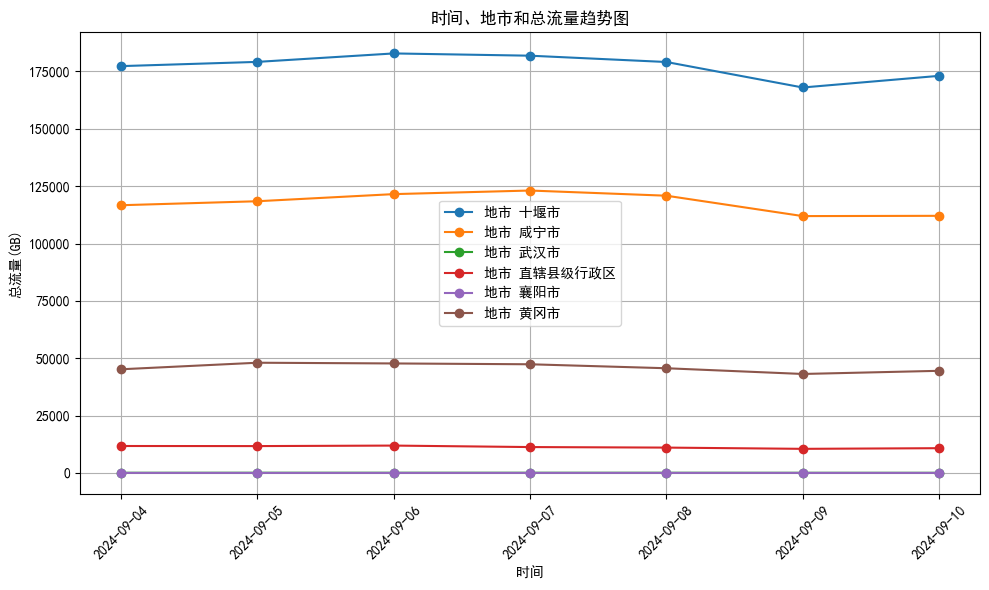

In [21]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
# 绘制趋势图
plt.figure(figsize=(10, 6))
for city in grouped_by_city['地市'].unique():
    city_data = grouped_by_city[grouped_by_city['地市'] == city]
    plt.plot(city_data['开始时间'], city_data['总流量'], marker='o', label=f'地市 {city}')

plt.title('时间、地市和总流量趋势图')
plt.xlabel('时间')
plt.ylabel('总流量(GB)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()